In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Загрузка датасета
wdbc = load_breast_cancer()

# Преобразование в pandas DataFrame
df = pd.DataFrame(data=wdbc.data, columns=wdbc.feature_names)
df['target'] = wdbc.target

# Разделение на признаки и метки
X = df.drop('target', axis=1)
y = df['target']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение метода главных компонент (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


KeyboardInterrupt: 

In [18]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def deriv_sigmoid(x):
     fx = sigmoid(x)
     return fx * (1 - fx)

def mse_loss(y_true, y_pred):
     return ((y_true - y_pred[0]) ** 2).mean()


class OurNeuralNetwork:
    def __init__(self):
        
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    

    def train(self, data, all_y_trues):
        learn_rate = 0.05
        epochs = 1000
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):

                sum_h1 = self. w1 * x[0] + self. w2 * x[1] + self. b1 
                h1 = sigmoid(sum_h1)
                sum_h2 = self. w3 * x[0] + self. w4 * x[1] + self.b2 
                h2 = sigmoid(sum_h2)
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3 
                o1 = sigmoid(sum_o1) 
                y_pred = o1

                d_L_d_ypred = -2 * (y_true-y_pred)

                #o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                #o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
                #  h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2

                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1


                #  h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
        if epoch % 1000 == 0:
            y_preds = np.apply_along_axis(self.feedforward, 1, data) 
            loss = mse_loss(all_y_trues, y_preds)
            print("Epoch %d loss: %.6f" % (epoch, loss))
                



In [19]:
# Создание экземпляра вашего перцептрона
nn1 = OurNeuralNetwork()
nn1.train(X_pca, y)

# Получение предсказаний вашего перцептрона
y_pred1 = nn1.feedforward(X_pca)


In [20]:
# Создание экземпляра MLP классификатора
mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=1)

# Обучение MLP классификатора
mlp.fit(X_pca, y)

# Получение предсказаний MLP классификатора
y_pred2 = mlp.predict(X_pca)


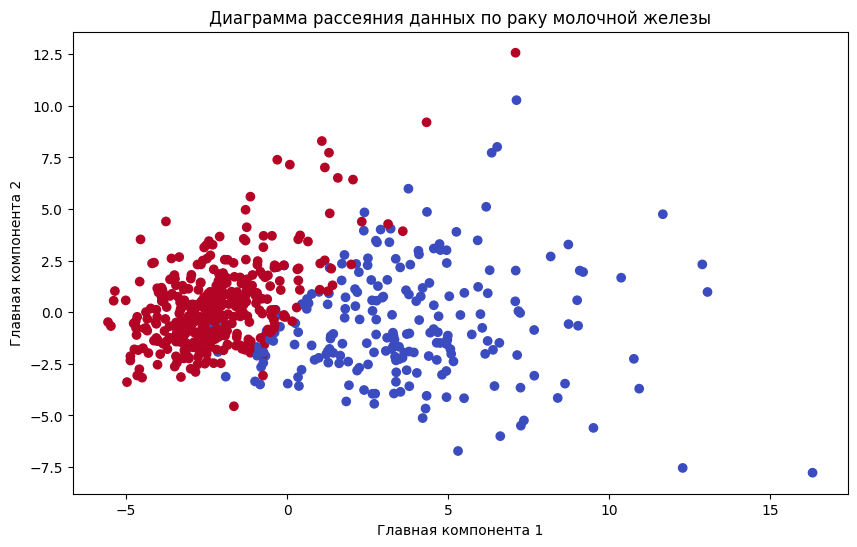

In [21]:
import matplotlib.pyplot as plt

# Визуализация исходных точек с раскраской по предсказаниям
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')


plt.title("Диаграмма рассеяния данных по раку молочной железы")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()


In [22]:
# Вычисление среднеквадратичной ошибки для вашего перцептрона
mse1 = mse_loss(y, y_pred1)
print("MSE loss for Your Perceptron: %.6f" % mse1)

# Вычисление среднеквадратичной ошибки для MLP
mse2 = mse_loss(y, y_pred2)
print("MSE loss for MLP: %.6f" % mse2)


MSE loss for Your Perceptron: 0.602022
MSE loss for MLP: 0.627417
